In [ ]:
#Classification task — Predict time (Lunch or Dinner) based on other features like total_bill, tip, sex, smoker, day, size.
# Naive Bayes Project

In [7]:
#1. Import Libraries and Load Data
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np 

# tips dataset
df= sns.load_dataset('tips')


In [8]:
#2.exploring the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


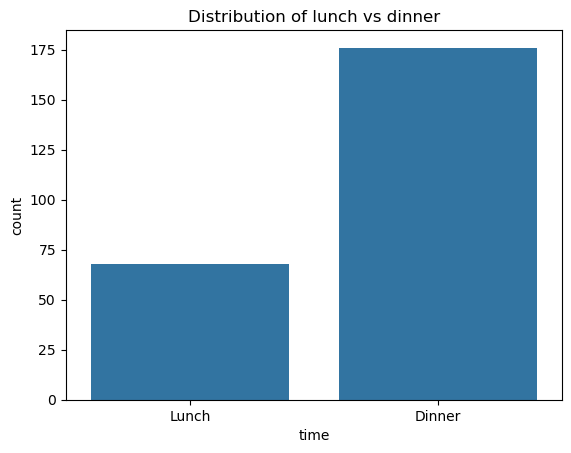

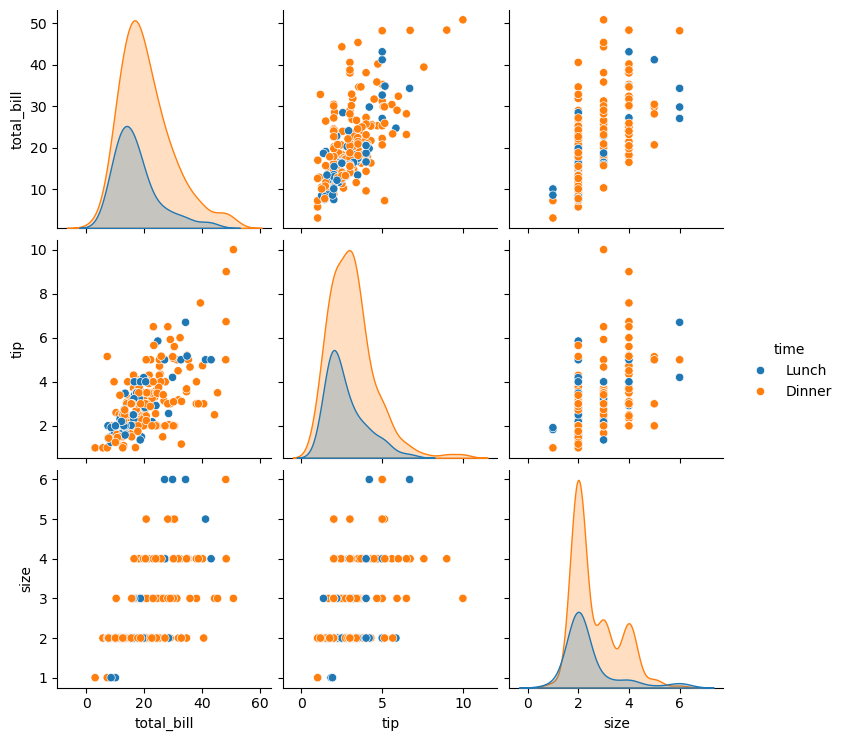

In [10]:
#3.data visualization
#analyzing if there is any imbalance in dataset 
sns.countplot(x='time',data=df)
plt.title('Distribution of lunch vs dinner')
plt.show() 

#pairplot
sns.pairplot(df,hue='time')
plt.show()


In [33]:
#4.preprocessing 
from sklearn.preprocessing import LabelEncoder
df_encoded=df.copy()

# encoding other categorial variables
# Make separate encoders
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_day = LabelEncoder()
le_time = LabelEncoder()


df_encoded['sex'] = le_sex.fit_transform(df_encoded['sex'])
df_encoded['smoker'] = le_smoker.fit_transform(df_encoded['smoker'])
df_encoded['day'] = le_day.fit_transform(df_encoded['day'])
df_encoded['time'] = le_time.fit_transform(df_encoded['time'])

#  encding target variable   
le_time = LabelEncoder()
df_encoded['time']= le_time.fit_transform(df_encoded['time']) 

  


In [34]:
#5.spliting features and target 
x=df_encoded.drop('time',axis=1)
y=df_encoded['time']



In [35]:
#6.train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [36]:
#7.model training with naive bayes
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()
model.fit(x_train,y_train)



GaussianNB()

In [37]:
#8.predictions and evaluation metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

accuracy: 0.9387755102040817

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.93      0.87      0.90        15

    accuracy                           0.94        49
   macro avg       0.94      0.92      0.93        49
weighted avg       0.94      0.94      0.94        49



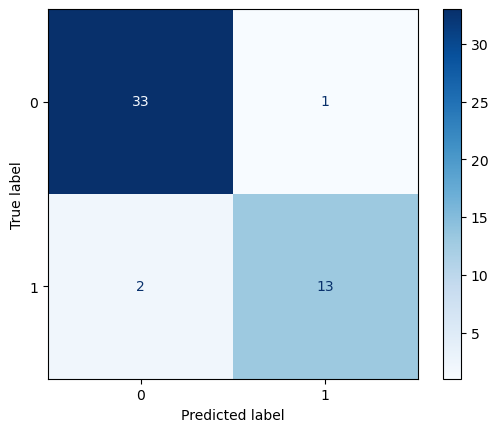

In [38]:
y_pred=model.predict(x_test)

print("accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#confusion matrix
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le_time.classes_)
#plot
disp.plot(cmap='Blues')
plt.show()

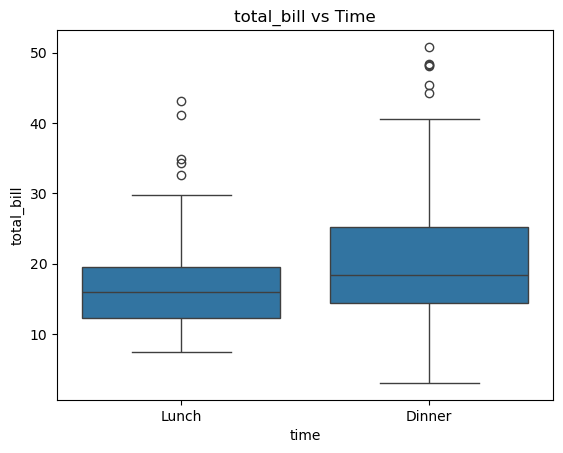

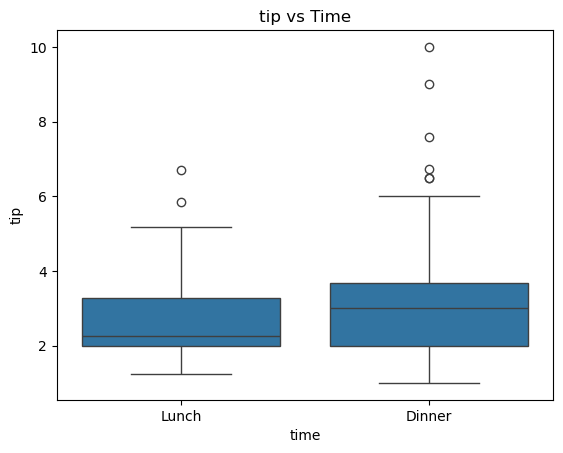

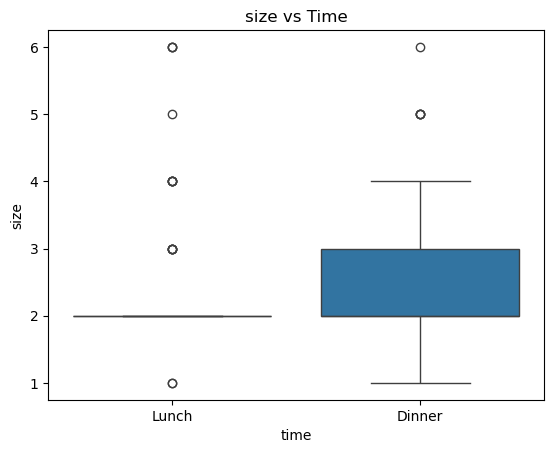

In [39]:
#understanding the model 
for col in ['total_bill','tip','size']:
    sns.boxplot(x='time',y=col,data=df)
    plt.title(f'{col} vs Time')
    plt.show()
    

In [50]:
#hyperparamter tuning the model to increase the accuracy and performance 
#using grid search cv 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(-12, -6, 20)
}
  # empty dictionary
grid = GridSearchCV(model, param_grid=param_grid, cv=5)
grid.fit(x_train, y_train)






GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e-12, 2.06913808e-12, 4.28133240e-12, 8.85866790e-12,
       1.83298071e-11, 3.79269019e-11, 7.84759970e-11, 1.62377674e-10,
       3.35981829e-10, 6.95192796e-10, 1.43844989e-09, 2.97635144e-09,
       6.15848211e-09, 1.27427499e-08, 2.63665090e-08, 5.45559478e-08,
       1.12883789e-07, 2.33572147e-07, 4.83293024e-07, 1.00000000e-06])})

In [52]:
tuned_model = grid.best_estimator_
y_pred_tuned=tuned_model.predict(x_test)

tuned_accuracy= accuracy_score(y_test,y_pred_tuned)
print("Tuned GaussianNB Accuracy:",tuned_accuracy)
print("Best var_smoothing:",grid.best_params_)  

Tuned GaussianNB Accuracy: 0.9387755102040817
Best var_smoothing: {'var_smoothing': 1e-12}


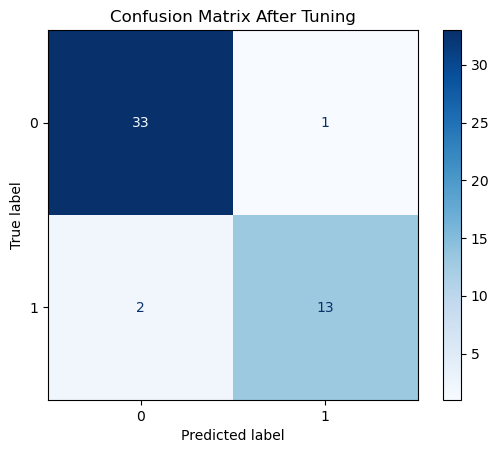

In [59]:
# 📊 Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_time.classes_)

disp.plot(cmap='Blues')
plt.title("Confusion Matrix After Tuning")
plt.show()




In [ ]:
#the model is very accurate at predicting Lunch/Dinner.

#1.Class-wise performance is balanced — no major bias toward any class.

#2.Only a few misclassifications (e.g., 2 Lunch predicted as Dinner and 1 Dinner as Lunch).

In [ ]:
#saving model 
import joblib 
joblib.dump(model,'naive_bayes_time_model.pkl')
joblib.dump(le_time,'label_encoder_time.pkl')
joblib.dump(le_sex, 'le_sex.pkl')
joblib.dump(le_smoker, 'le_smoker.pkl')
joblib.dump(le_day, 'le_day.pkl')
